In [2]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value
from funzioni import polarizzazione 
from funzioni import allpixel
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:

frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])


In [5]:
Sky_D=pysm3.Sky(nside=64, preset_strings=["d0"])
Sky_S=pysm3.Sky(nside=64, preset_strings=["s0"])

In [6]:
map_D_I = Sky_D.get_emission(545 * u.GHz)
map_D = Sky_D.get_emission(353 * u.GHz) 

In [7]:
map_S_I = Sky_S.get_emission(0.408 * u.GHz) 
map_S = Sky_S.get_emission(23 * u.GHz)

In [8]:
I_D=get_pixel_value(frequencies,npix=1,Stokes=0,sky=Sky_D)
I_S=get_pixel_value(frequencies,npix=1,Stokes=0,sky=Sky_S)

In [9]:
allpixel_D, err_D = allpixel (frequencies,Stokes=0,sky=Sky_D)
allpixel_S, err_S = allpixel (frequencies,Stokes=0,sky=Sky_S)

In [10]:
allpixel_D_arr=np.asarray(allpixel_D)
allpixel_S_arr=np.asarray(allpixel_S)
err_D_arr=np.asarray(err_D)
err_S_arr=np.asarray(err_S)

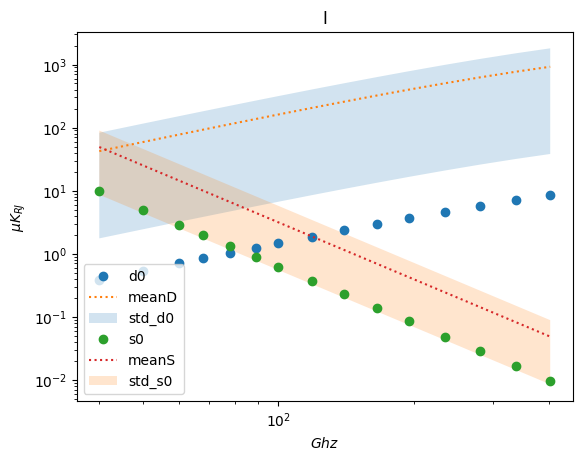

In [11]:
plt.plot(frequencies,I_D,'o',label="d0")
plt.plot(frequencies,allpixel_D,':',label="meanD")
plt.fill_between(frequencies,allpixel_D_arr+err_D_arr, allpixel_D_arr-err_D_arr, alpha=0.2, label="std_d0")
plt.plot(frequencies,I_S,'o',label="s0")
plt.plot(frequencies,allpixel_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_S_arr+err_S_arr, allpixel_S_arr-err_S_arr, alpha=0.2, label="std_s0")


plt.title("I")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [12]:
Q_D=get_pixel_value(frequencies,npix=1,Stokes=1,sky=Sky_D)
Q_S=get_pixel_value(frequencies,npix=1,Stokes=1,sky=Sky_S)


In [13]:
allpixel_Q_D, err_Q_D = allpixel (frequencies,Stokes=1,sky=Sky_D)
allpixel_Q_S, err_Q_S = allpixel (frequencies,Stokes=1,sky=Sky_S)

In [14]:
U_D=get_pixel_value(frequencies,npix=1,Stokes=2,sky=Sky_D)
U_S=get_pixel_value(frequencies,npix=1,Stokes=2,sky=Sky_S)

In [15]:
allpixel_U_D, err_U_D = allpixel (frequencies,Stokes=2,sky=Sky_D)
allpixel_U_S, err_U_S = allpixel (frequencies,Stokes=2,sky=Sky_S)

In [16]:
allpixel_Q_D_arr=np.asarray(allpixel_Q_D)
allpixel_Q_S_arr=np.asarray(allpixel_Q_S)
err_Q_D_arr=np.asarray(err_Q_D)
err_Q_S_arr=np.asarray(err_Q_S)

In [17]:
allpixel_U_D_arr=np.asarray(allpixel_U_D)
allpixel_U_S_arr=np.asarray(allpixel_U_S)
err_U_D_arr=np.asarray(err_U_D)
err_U_S_arr=np.asarray(err_U_S)

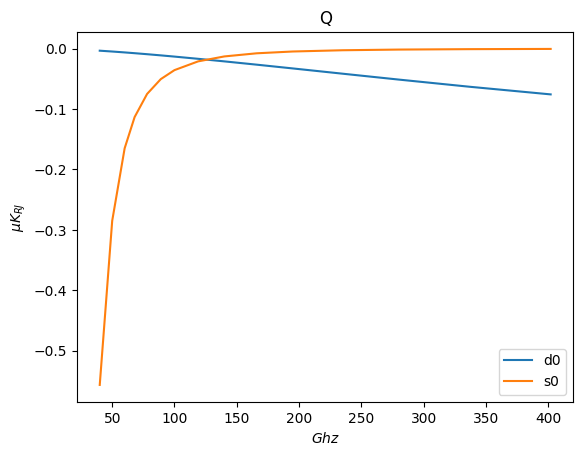

In [18]:
plt.plot(frequencies,Q_D,'-',label="d0")
plt.plot(frequencies,Q_S,'-',label="s0")
plt.title("Q")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

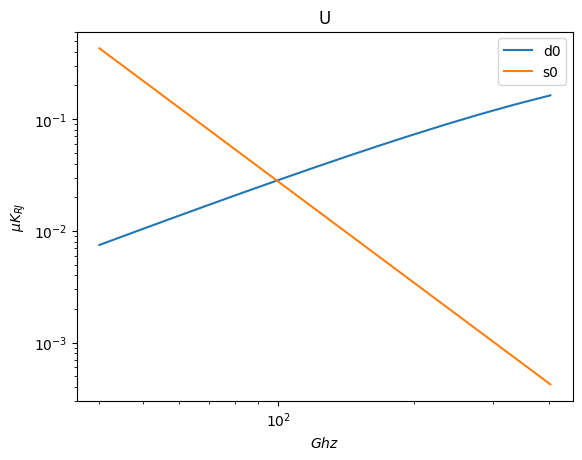

In [19]:
plt.plot(frequencies,U_D,'-',label="d0")
plt.plot(frequencies,U_S,'-',label="s0")
plt.title("U")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [20]:
P_D=polarizzazione(Q_D,U_D)
allpixel_P_D=polarizzazione(allpixel_Q_D,allpixel_U_D)
err_P_D=polarizzazione(err_Q_D,err_U_D)



In [21]:
P_S=polarizzazione(Q_S,U_S)
allpixel_P_S=polarizzazione(allpixel_Q_S,allpixel_U_S)
err_P_S=polarizzazione(err_Q_S,err_U_S)
#print(P_s)
#norm_P_s=norma(P_s,value=0.42521915203993693)


In [22]:
allpixel_P_D_arr=np.asarray(allpixel_P_D)
allpixel_P_S_arr=np.asarray(allpixel_P_S)
err_P_D_arr=np.asarray(err_P_D)
err_P_S_arr=np.asarray(err_P_S)

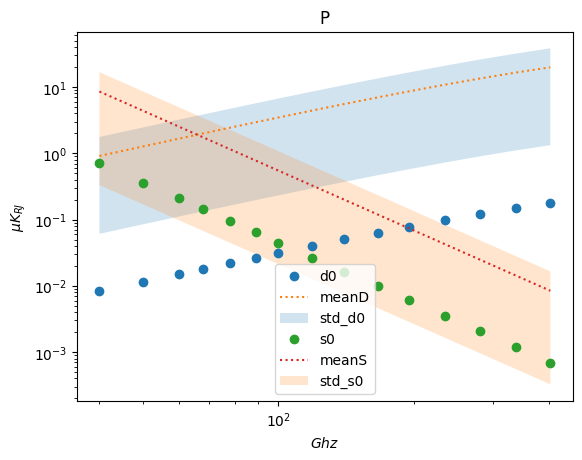

In [23]:

plt.plot(frequencies,P_D,'o',label="d0")
plt.plot(frequencies,allpixel_P_D,':',label="meanD")
plt.fill_between(frequencies, allpixel_P_D_arr+err_P_D_arr, allpixel_P_D_arr-err_P_D_arr, alpha=0.2, label="std_d0")
plt.plot(frequencies,P_S,'o',label="s0")
plt.plot(frequencies,allpixel_P_S,':',label="meanS")
plt.fill_between(frequencies, allpixel_P_S_arr+err_P_S_arr, allpixel_P_S_arr-err_P_S_arr, alpha=0.2, label="std_s0")




plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()
